In [1]:
import zeldovich as z
import numpy as np
import matplotlib.pyplot as plt
import gc

# Sanity check for initial Density Field Class

In [12]:
a = z.initial_density_field()
deltax=a.initial_deltax()
GridSize = a.GridSize
variance = a.var() ####variance of the real and imaginary part of deltak random number  
variance = np.append(variance[:,:,::-2],variance)
print 'Variance of  delta x' ,np.var(deltax)
print 'Sum of Discrete Power Spectrum is ',np.sum(variance*2)
x_array = a.x_range()
print a.dx

Variance of  delta x 0.0181747260494
Sum of Discrete Power Spectrum is  0.0158556287672
0.01


In [13]:
del a 
del variance
gc.collect()


495

# Sanity check for Interpolation method class

In [18]:
a = z.zeldovich()
Position = a.Position(RedShift=10)
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()
b= z.pmInterpolation()
Lbox = a.XSize
R = 0.02
ngp = b.ngp(PositionX,PositionY,PositionZ,Lbox,GridSize)
ngps = b.ngp_smooth(PositionX,PositionY,PositionZ,Lbox,GridSize,R)
cic = b.cic(PositionX,PositionY,PositionZ,Lbox,GridSize)
cicl = b.cicl(PositionX,PositionY,PositionZ,Lbox,GridSize)


#### 1)   Sum of all  DELTAX = Summation over Grid Cells (Counts-1)=TotalCounts-TotalCounts=0

In [19]:
print 'Sum of delta x (NGP)        ',np.sum(ngp-1)
print 'Sum of delta x (NGP_smooth) ',np.sum(ngps-1)
print 'Sum of delta x (CIC)        ',np.sum(cic-1)
print 'Sum of delta x (CIC_LOOP)   ',np.sum(cicl-1)


Sum of delta x (NGP)         0
Sum of delta x (NGP_smooth)  -1.02318153949e-12
Sum of delta x (CIC)         -2.39651853917e-10
Sum of delta x (CIC_LOOP)    -2.6398083719e-10


#### 2)   Residues between different Interpolation

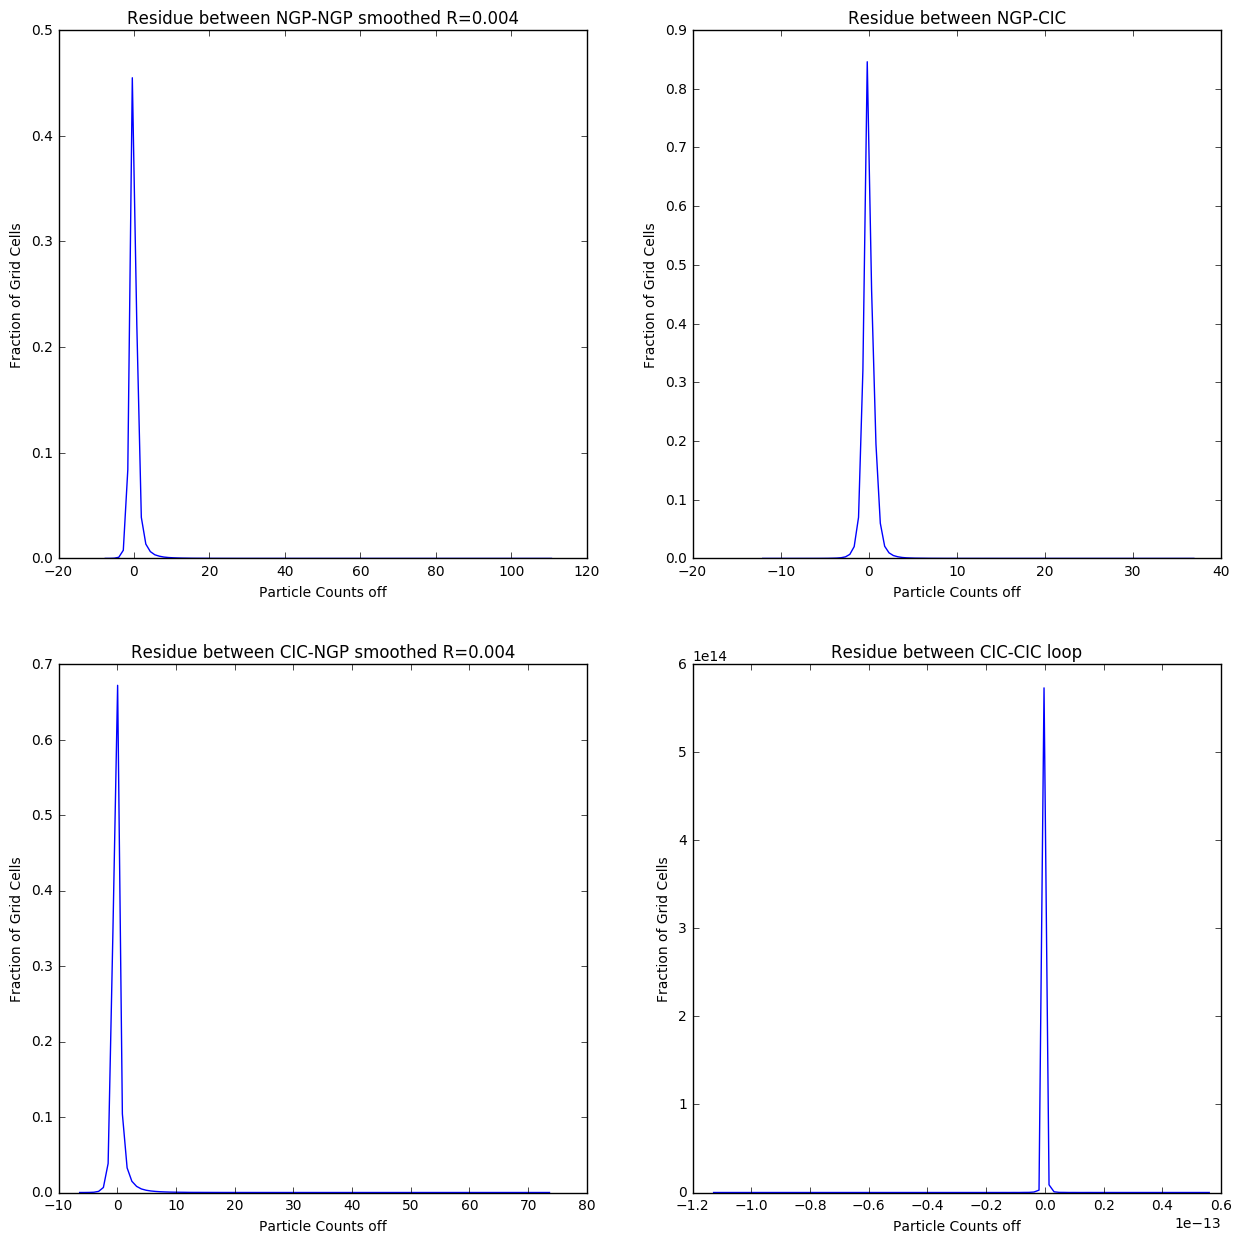

In [20]:
fig=plt.figure(figsize=(15,15), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
ngp_ngps ,edges = np.histogram((ngp-ngps),bins=100,normed = 1)
plt.plot((edges[0:-1]+edges[1:])/2,ngp_ngps)
plt.title('Residue between NGP-NGP smoothed R=0.004')
plt.xlabel('Particle Counts off')
plt.ylabel('Fraction of Grid Cells')
#plt.ylim([0,1])
plt.subplot(2,2,2)
ngp_cic ,edges =np.histogram((ngp-cic),bins=100, normed = 1)
plt.plot((edges[0:-1]+edges[1:])/2,ngp_cic)
#plt.ylim([0,1])
plt.title('Residue between NGP-CIC')
plt.xlabel('Particle Counts off')
plt.ylabel('Fraction of Grid Cells')
plt.subplot(2,2,3)
cic_ngps ,edges =np.histogram((cic-ngps),bins=100,normed = 1)
plt.plot((edges[0:-1]+edges[1:])/2,cic_ngps)
#plt.ylim([0,1])
plt.title('Residue between CIC-NGP smoothed R=0.004')
plt.xlabel('Particle Counts off')
plt.ylabel('Fraction of Grid Cells')
plt.subplot(2,2,4)
cic_cicl ,edges =np.histogram((cic-cicl),bins=100,normed = 1)
plt.plot((edges[0:-1]+edges[1:])/2,cic_cicl)
#plt.ylim([0,1])
plt.title('Residue between CIC-CIC loop')
plt.xlabel('Particle Counts off')
plt.ylabel('Fraction of Grid Cells')
plt.show()

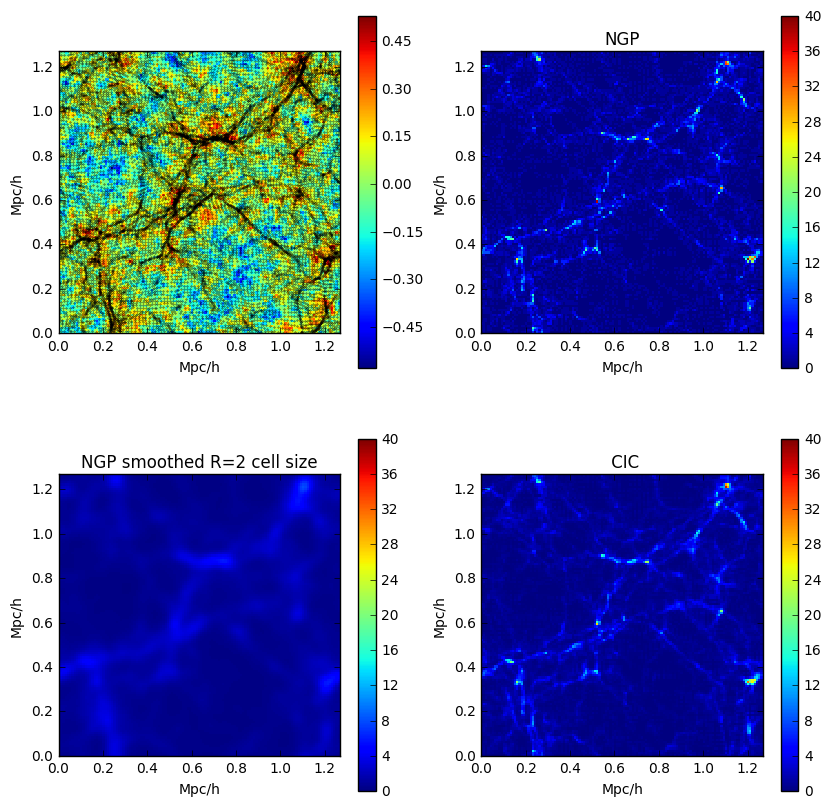

In [25]:
X = Position[0,:,:,3].reshape([GridSize**2])
Y = Position[1,:,:,3].reshape([GridSize**2])
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.pcolor(x_array,x_array,deltax[:,:,3])
plt.colorbar()
#plt.gca().invert_yaxis()
plt.scatter(Y,X,s=0.09,color='black')
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.subplot(2,2,2)
plt.pcolor(x_array,x_array,ngp[:,:,3],vmin=0,vmax=40)
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('NGP')
plt.subplot(2,2,3)
plt.pcolor(x_array,x_array,ngps[:,:,3],vmin=0,vmax=40)
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.colorbar()
plt.title('NGP smoothed R=2 cell size')
plt.subplot(2,2,4)
plt.pcolor(x_array,x_array,cic[:,:,3],vmin=0,vmax=40)
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.title(' CIC')
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.colorbar()

plt.savefig('interpol1.png',dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10


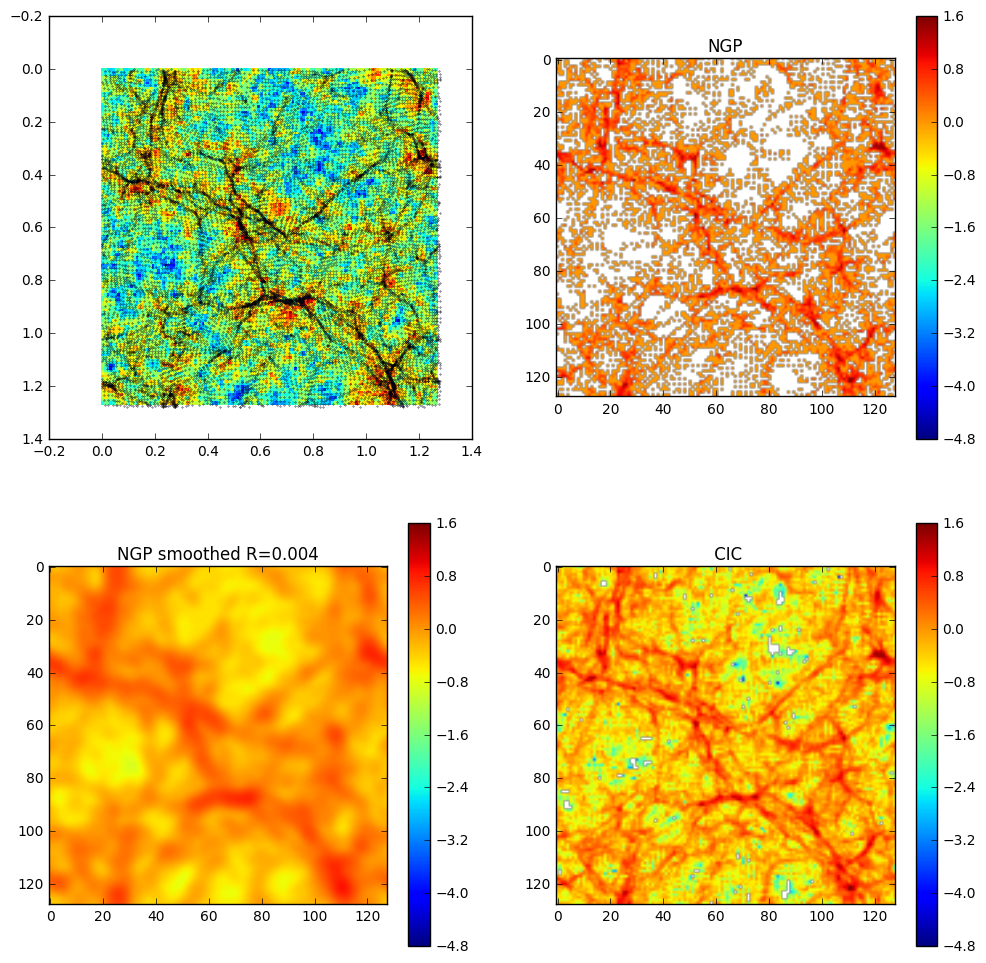

In [22]:
import numpy.ma as ma 
fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.pcolor(x_array,x_array,deltax[:,:,3])
plt.gca().invert_yaxis()
plt.scatter(Y,X,s=0.09)

#plt.title('Residue between NGP-NGP smoothed')
#plt.xlabel('Particle Counts off')
#plt.ylabel('Number of Grid Cells')
plt.subplot(2,2,2)
plt.imshow(ma.masked_invalid(np.log10(ngp[:,:,3])),vmin=-4.8,vmax=1.6)
plt.colorbar()
plt.title('NGP')
#plt.xlabel('Particle Counts off')
#plt.ylabel('Number of Grid Cells')
plt.subplot(2,2,3)
plt.imshow(ma.masked_invalid(np.log10(ngps[:,:,3])),vmin=-4.8,vmax=1.6)
plt.colorbar()
plt.title('NGP smoothed R=0.004')
#plt.xlabel('Particle Counts off')
#plt.ylabel('Number of Grid Cells')
plt.subplot(2,2,4)
plt.imshow(ma.masked_invalid(np.log10(cic[:,:,3])),vmin=-4.8,vmax=1.6)
plt.title(' CIC')
plt.colorbar()
#plt.xlabel('Particle Counts off')
#plt.ylabel('Number of Grid Cells')

plt.show()